In the beginning of the year, I had created a real money port using O'Shaughnessy Trending value. I am a big fan of his *What Works in Wallstreet* book. In August I had liquidated the possion and just replaced it with the current Small Dogs of the Dow. The Small Dogs of the Dow are not as good as just buy the ETF SPY which is *my bench mark*. But it is good.

Part of the reason why I am doing this post is that I am starting to feel that I could have purchased SPY when I started investing again in late 1999, made more money and had less headaches by just buying SPY and let it ride. The Market is smarter than I am. It is more for my Investment journey since I feel that I need to be more conservative in my choices.

This post compares three choices that I was thinking about January 1, 2019: Dogs of the Dow, Trending Value, SPY. I had bet very wrong with Trending Value.

The Trending Value stocks were generated using AAII Stock Investor Pro.

In [3]:
#Load Libaries
pacman::p_load("quantmod", "tseries", "PerformanceAnalytics")

Trending Value Stocks that I purchase. Barns & Noble is commented out since it was [purchased by Elliott June 7th](https://www.sec.gov/Archives/edgar/data/890491/000095014219001298/eh1900779_ex9901.htm) Removing is oversimplification but still gives me a picture of performance.

In [4]:
trendvalueSymbols <-
  c(
    "AFL",
    "AGO",
    "ANAT",
    # "BKS", # Purchased
    "CHA",
    "CHL",
    "CLW",
    "CSIQ",
    "CTB",
    "EIG",
    "ELP",
    "GHC",
    "HRB",
    "KEN",
    "KT",
    "NRP",
    "OFG",
    "PDLI",
    "REGI",
    "SBS",
    "SCVL",
    "SIM",
    "SKM",
    "UAL",
    "VIV"
  )

Dogs of the Dow for 2019

In [5]:
DoDSymbols <-
  c("IBM", "XOM", "VZ", "CVX", "PFE", "KO", "JPM", "PG", "CSCO", "MRK")

Benchmark: SPY

In [6]:
SpyderSymbols <- c("SPY")

Get Stock Data

In [7]:
options("getSymbols.warning4.0"=FALSE)
getSymbols(trendvalueSymbols,
           src = 'yahoo',
           from = '2019-01-08',
           to = '2019-11-08')
getSymbols(SpyderSymbols,
           src = 'yahoo',
           from = '2019-01-08',
           to = '2019-11-08')
getSymbols(DoDSymbols,
           src = 'yahoo',
           from = '2019-01-08',
           to = '2019-11-08')

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 sy

[1] "AFL"  "AGO"  "ANAT" "CHA"  "CHL"  "CLW"  "CSIQ" "CTB"  "EIG"  "ELP" 
[11] "GHC"  "HRB"  "KEN"  "KT"   "NRP"  "OFG"  "PDLI" "REGI" "SBS"  "SCVL"
[21] "SIM"  "SKM"  "UAL"  "VIV"

[1] "SPY"

pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols


[1] "IBM"  "XOM"  "VZ"   "CVX"  "PFE"  "KO"   "JPM"  "PG"   "CSCO" "MRK"

Put data in lists

In [8]:
pricesTV <- list()
pricesSPY <- list()
pricesDoD <- list()

for (i in 1:length(trendvalueSymbols)) {
  pricesTV[[i]] <- Ad(get(trendvalueSymbols[i]))
}
pricesTV <- do.call(cbind, pricesTV)
colnames(pricesTV) <- c(trendvalueSymbols)

for (i in 1:length(SpyderSymbols)) {
  pricesSPY[[i]] <- Ad(get(SpyderSymbols[i]))
}
pricesSPY <- do.call(cbind, pricesSPY)
colnames(pricesSPY) <- c(SpyderSymbols)

for (i in 1:length(DoDSymbols)) {
  pricesDoD[[i]] <- Ad(get(DoDSymbols[i]))
}
pricesDoD <- do.call(cbind, pricesDoD)
colnames(pricesDoD) <- c(DoDSymbols)

Generate Returns and prep for charting

In [9]:
# generate daily returns
returnsTV <- na.omit(ROC(pricesTV, 1, "discrete"))
returnsSPY <- na.omit(ROC(pricesSPY, 1, "discrete"))
returnsDoD <- na.omit(ROC(pricesDoD, 1, "discrete"))

#Prep for charting
portfolio.tv <-
  Return.portfolio(returnsTV, wealth.index = TRUE, verbose = TRUE)
portfolio.spy <-
  Return.portfolio(returnsSPY, wealth.index = TRUE, verbose = TRUE)
portfolio.dod <-
  Return.portfolio(returnsDoD, wealth.index = TRUE, verbose = TRUE)

portfolios.2 <-
  cbind(portfolio.tv$returns,
        portfolio.spy$returns,
        portfolio.dod$returns)
colnames(portfolios.2) <-
  c("Trending Value", "SPYders", "Dogs of Dow")

Chart

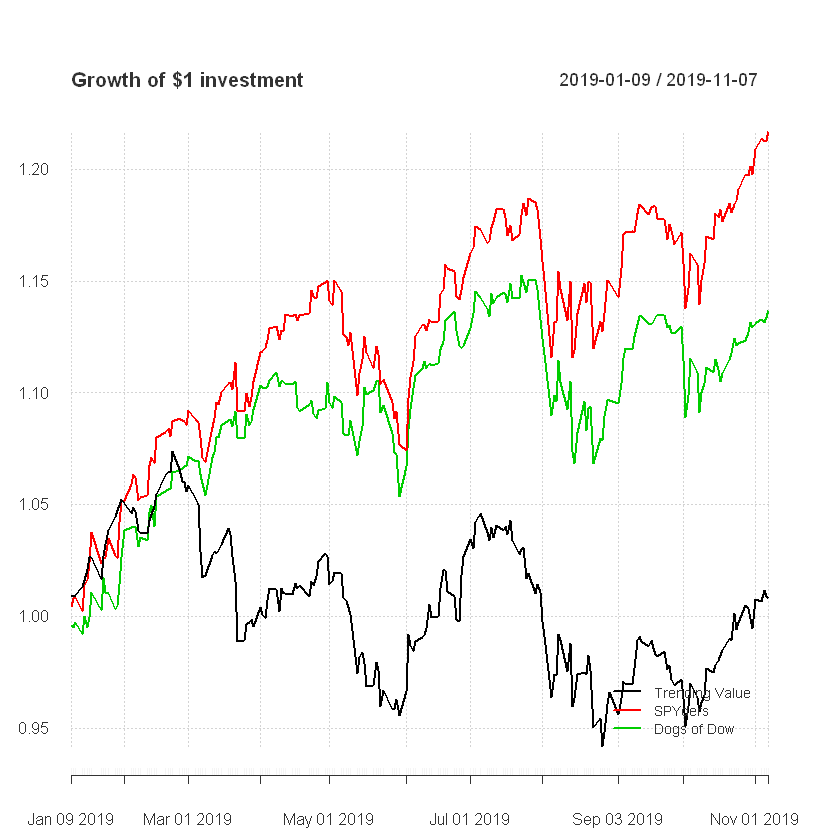

In [10]:
chart.CumReturns(
  portfolios.2,
  wealth.index = TRUE,
  legend.loc = "bottomright",
  main = "Growth of $1 investment",
  ylab = "$"
)

Returns

In [11]:
table.AnnualizedReturns(portfolios.2)

Trending Value SPYders Dogs of Dow
Annualized Return         0.0099         0.2643  0.1653     
Annualized Std Dev        0.1276         0.1258  0.1158     
Annualized Sharpe (Rf=0%) 0.0774         2.1010  1.4270

I don't have time to go into detail this morning. My day job calls. However the difference in returns is glaring. I will let you draw your own conclusions on this.